# Train output visualization
train data는 자체적으로 annoation을 갖고 있어, 학습한 모델을 training model에 넣은 결과와 비교해 모델이 어떤 식으로 학습 했는지, training data에 대해 학습이 잘 됐는지 직접 확인할 수 있습니다.

이를 위해 training data로 inference를 진행해 나온 csv 파일로 visualization 후, GT를 visualization한 image와 비교하는 notebook입니다.

사전 작업
1. submission 형태의 csv 파일을 현재 notebook 폴더 내로 이동시켜주세요!
2. 밑의 코드에서 csv에 포함된 image_id를 읽을 수 있게 경로를 지정해주세요!

In [1]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import random
import json

In [2]:
output_csv = pd.read_csv('./submission_latest_train.csv')

In [3]:
output_csv

,PredictionString,image_id
0,0 0.95434123 204.92639 229.72278 744.8384 660....,train/0000.jpg
1,0 0.930253 437.53326 688.10956 625.5721 856.72...,train/0001.jpg
2,0 0.114015795 257.8705 158.55734 884.4064 673....,train/0002.jpg
3,0 0.78078586 755.72125 37.05284 948.5385 418.6...,train/0003.jpg
4,0 0.10157026 861.4098 405.58087 1016.1649 614....,train/0004.jpg
...,...,...
4878,0 0.7818928 381.79456 367.0125 715.0807 627.32...,train/4878.jpg
4879,0 0.87885207 654.1045 608.76776 756.92126 798....,train/4879.jpg
4880,0 0.83586574 194.43997 171.66733 769.1814 848....,train/4880.jpg
4881,0 0.50888354 113.42279 35.640823 831.82935 512...,train/4881.jpg


In [4]:
# output_csv['PredictionString'] : str 형태
# 띄어쓰기를 기준으로 split 후, Bbox 크기만큼 재조합

In [5]:
# 필요에 맞게 image_dir를 수정해주세요!
image_dir = '../../dataset/'
b_box_info = []

for pred_str in output_csv['PredictionString']:
    
    # 해당 image에 대해 탐지한 Bbox가 없는 경우, 빈 list를 넣어준다.
    if type(pred_str) != str:
        b_box_info.append([])
        continue
        
    # 띄어쓰기를 기준으로 split
    split_pred_str = str.split(pred_str)
    split_pred_str = list(map(float, split_pred_str))

    # 한 Bbox를 나타내는 데 6개의 index 정보를 사용하므로, 6개 단위로 list로 만들어 b_box_info에 append
    grouped_pred_str = [split_pred_str[i:i+6] for i in range(0, len(split_pred_str), 6)]
    b_box_info.append(grouped_pred_str)
    
# b_box_info : [image 수, detecting한 box 수, 6] shape를 갖게 된다.

In [6]:
# class 0 : 빨강 General trash
# class 1: 주황 Paper
# class 2: 노랑 Paper pack
# class 3: 연두 Metal
# class 4: 초록 Glass
# class 5: 청록 Plastic
# class 6: 파랑 Styrofoam
# class 7: 남색 Plastic bag
# class 8 : 보라 Battery
# class 9 : 자주 Clothing
rgb_color = [(255, 0, 0), \
            (255, 127, 0), \
            (255, 212, 0), \
            (191, 255, 0), \
            (0, 128, 0), \
            (0, 86, 102), \
            (0, 103, 163), \
            (0, 0, 128), \
            (139, 0, 255), \
            (102, 0, 153)] 

# random image visualization

1578


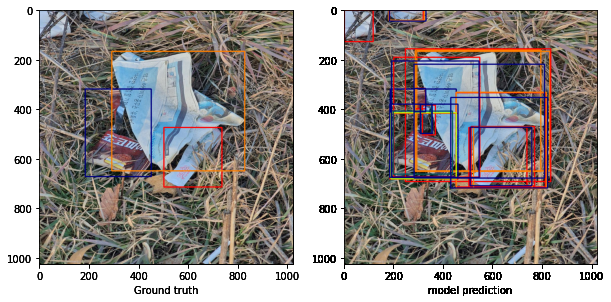

In [14]:
img_num = random.randint(0, len(output_csv['image_id']))
print(img_num)
fig = plt.figure(figsize=(10, 10))

image = cv2.imread(image_dir + output_csv['image_id'][img_num], cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

with open('../../dataset/train.json', 'r') as f:
    train_json = json.load(f)
anns = [ann for ann in train_json['annotations'] if ann['image_id'] == img_num]
for ann in anns:
    classes = ann['category_id']
    xmin, ymin, w, h = map(int, ann['bbox'])
    image = cv2.rectangle(image, (xmin, ymin), (xmin + w, ymin + h), 
                          rgb_color[classes], 3)
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(image)
    ax.set_xlabel('Ground truth')

for box in b_box_info[img_num]:
    classes = int(box[0])
    x_min, y_min, x_max, y_max = map(int, [box[2], box[3], box[4], box[5]])
    image = cv2.rectangle(image, (x_min, y_min), (x_max, y_max), 
                          rgb_color[classes], 3)
    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(image)
    ax.set_xlabel('model prediction')

    